## MNIST Image Classification using GMM ##

In [171]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

### Import Dataset ###

In [172]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [173]:
print(X_train.shape)

(56000, 784)


In [174]:
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(56000, 331)


### Fit GMM ###

In [175]:
gmm = GaussianMixture(n_components=10, init_params='kmeans' ,random_state=42)
gmm.fit(X_train_pca)

clusters = gmm.predict(X_test_pca)

c:\Users\yahya\miniconda3\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


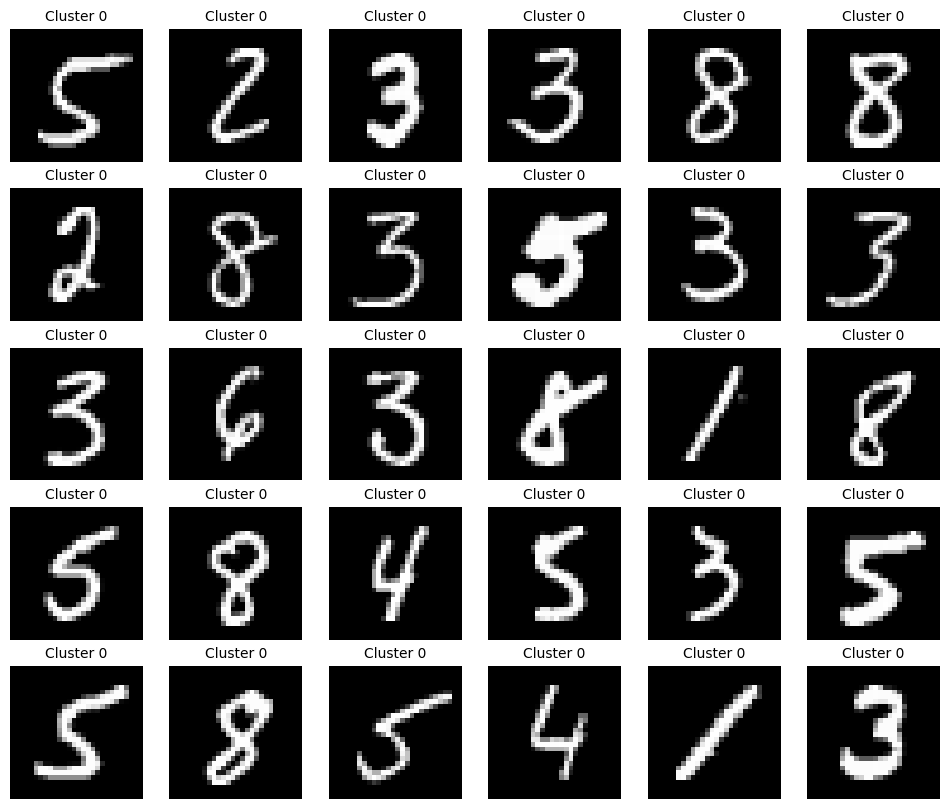

In [176]:
num_images_to_show = 30

cluster_0_indices = np.where(clusters == 1)[0]
cluster_0_images = X_test[cluster_0_indices][:num_images_to_show]  # Select first 10 images

# Reshape the images
cluster_0_images_reshaped = cluster_0_images.reshape(-1, 28, 28)

# Plot the images
fig, axes = plt.subplots(5, 6, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    if i < num_images_to_show:
        ax.imshow(cluster_0_images_reshaped[i], cmap='gray')
        ax.axis('off')
        ax.set_title(f"Cluster 0", fontsize=10)
    else:
        ax.axis('off')

plt.show()

In [177]:
import pandas as pd

cluster_0_indices = np.where(clusters == 0)[0]
cluster_1_indices = np.where(clusters == 1)[0]
cluster_2_indices = np.where(clusters == 2)[0]
cluster_3_indices = np.where(clusters == 3)[0]
cluster_4_indices = np.where(clusters == 4)[0]
cluster_5_indices = np.where(clusters == 5)[0]
cluster_6_indices = np.where(clusters == 6)[0]
cluster_7_indices = np.where(clusters == 7)[0]
cluster_8_indices = np.where(clusters == 8)[0]
cluster_9_indices = np.where(clusters == 9)[0]

y_test_0 = y_test[cluster_0_indices]
y_test_1 = y_test[cluster_1_indices]
y_test_2 = y_test[cluster_2_indices]
y_test_3 = y_test[cluster_3_indices]
y_test_4 = y_test[cluster_4_indices]
y_test_5 = y_test[cluster_5_indices]
y_test_6 = y_test[cluster_6_indices]
y_test_7 = y_test[cluster_7_indices]
y_test_8 = y_test[cluster_8_indices]
y_test_9 = y_test[cluster_9_indices]

y_test_0 = pd.DataFrame(y_test_0)
y_test_1 = pd.DataFrame(y_test_1)
y_test_2 = pd.DataFrame(y_test_2)
y_test_3 = pd.DataFrame(y_test_3)
y_test_4 = pd.DataFrame(y_test_4)
y_test_5 = pd.DataFrame(y_test_5)
y_test_6 = pd.DataFrame(y_test_6)
y_test_7 = pd.DataFrame(y_test_7)
y_test_8 = pd.DataFrame(y_test_8)
y_test_9 = pd.DataFrame(y_test_9)

Correct = 0
y_tests = [y_test_0, y_test_1, y_test_2, y_test_3, y_test_4, y_test_5, y_test_6, y_test_7, y_test_8, y_test_9]

for val in y_tests:
    if len(val) != 0:
        Correct += val.value_counts().max()

accuracy = Correct/len(y_test)

print(f'Accuracy: {accuracy}')

Accuracy: 0.5207142857142857
